First we will load a 100 images to test the preprocessing speed

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
import skimage
import glob 
import os 
import random
import numpy as np
import pandas as pd
from PIL import ImageFile
from sklearn.model_selection import train_test_split

#what is the role of truncated images?
ImageFile.LOAD_TRUNCATED_IMAGES = True



In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, Sequential, models
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.applications import efficientnet, vgg16

The preprocessing below works. It has been commented out to replace it with a better one. 

In [4]:
# def preprocess_image(image):
#     resized = cv.resize(image,(300,300),interpolation = cv.INTER_AREA)
#     img = cv.medianBlur(resized,5)
#     ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
#     th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
#             cv.THRESH_BINARY,11,2)
#     th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv.THRESH_BINARY,15,2)
#     images = [th1, th2, th3, img]

    
#     return images
    

In [16]:
def preprocess_image_improved(image,reshape_size):
    if image.shape == (570, 1015, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[250:-100,100:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,50)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,13,3)
        (T, thresh1) = cv.threshold(resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        return images
    
    elif image.shape == (582, 1034, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[60:500,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,50)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,13,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        return images
    
    elif image.shape == (624, 1200, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[150:,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,100,100)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        return images
    
    #EL PORTO IMAGES FOR GOOD ARE FAILING SYSTEMATICALLY
    elif image.shape == (624, 1110, 4):
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[350:-100,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,50,250)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,9,5)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/250
        images[1] = images[1]/250
    
        return images
    
    
    #WE HAVE THROWN ALL OF THOSE IN HERE FOR NOW  
    else:
        image = cv.cvtColor(image, cv.COLOR_BGRA2BGR)
        cropped = image[150:,:]
        resized = cv.resize(cropped,(reshape_size,reshape_size),interpolation = cv.INTER_AREA)
        gray_img = np.uint8((cv.cvtColor(resized, cv.COLOR_BGR2GRAY))*250)
        edges = cv.Canny(gray_img,100,100)
        gaussian = cv.adaptiveThreshold(gray_img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,3)
        (T, thresh1) = cv.threshold( resized, 0.4, 0.6,
                            cv.THRESH_BINARY_INV)
        (T, thresh) = cv.threshold(resized, 0.6, 0.9, cv.THRESH_BINARY)
        images = [edges,gaussian,thresh1.T[0],thresh1.T[1],thresh1.T[2],thresh.T[0],thresh.T[1],thresh.T[2]]
        images[0] = images[0]/255
        images[1] = images[1]/255
        
        return images

In [18]:
X = []
y = []
idx = 0
failed =[]

for root , dirs , files in os.walk("raw_data"):
    if dirs:
        parent = root
        folders = dirs
        print(folders)

    if files:
        print(f"Preprocessing folder {folders[idx]}...")
        failed = [] 
        for file in np.random.choice(np.array(files),len(files), replace = False):
            try:
                original_image = plt.imread(os.path.join(parent , folders[idx], file))
                
                     
                processed_image = preprocess_image_improved(original_image,300)
                
                if len(processed_image) < 2:
                    print(f"problemita in {os.path.join(parent , folders[idx], file)}")
                else:
                    X.append(np.array(processed_image).T)
                    y.append(idx)
                #The print below was just to check the value for each situation
                #print(idx)
            
            except Exception as e:
                 print("Detected bad image!")
                 failed.append(os.path.join(parent , folders[idx], file))
                 continue
        
        idx += 1
        
X = np.array(X)
y = np.array(y)
X.shape , y.shape

['Flat', 'Chaotic', 'Good']
Preprocessing folder Flat...
Preprocessing folder Chaotic...
Preprocessing folder Good...


((522, 300, 300, 8), (522,))

The code below is a clue from Nicole about what can we do to fix X shape.

Let's augment the little data we have. Considering the nature of the data heavy rotations are not advised.

In [7]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     featurewise_center = False,
#     featurewise_std_normalization = False,
#     rotation_range = 10,
#     width_shift_range = 0.1,
#     height_shift_range = 0.1,
#     horizontal_flip = True,
#     zoom_range = (0.8, 1.2),
#     #I added brightness changes, I think they are relevant to our task
#     brightness_range =(0.5,1)
#     ) 

In [19]:
# INPUT_SHAPE = (4, 250, 250)
NUMBER_CLASSES = 3

In [20]:
X.shape
y_cat = to_categorical(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.30)

The model below works with the first preprocessing, there seem to be some serious issues when trying to apply any kind of max pooling though.

In [22]:
def initialize_basic():
    #Create an empty template
    model = models.Sequential()
    
    model.add(layers.Conv2D(64, (3,3), input_shape= (300,300,8), padding='same', activation="relu"))
    
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(3, activation = "softmax"))
    return model


In [23]:
def compile_model(model, learning_rate=1e-4):
    model.compile(loss = "categorical_crossentropy",
                            optimizer = Adam(learning_rate=learning_rate),
                            metrics = ["accuracy"])
    return model

In [24]:
test_model = initialize_basic()

In [25]:
compile_model(test_model)


In [26]:
es = EarlyStopping(patience = 3,restore_best_weights= True)
test_model.fit(X_train , y_train ,callbacks = [es] ,validation_split = 0.2, epochs = 64, batch_size = 64)

Epoch 1/64


2022-12-01 11:45:44.372049: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 14s 2s/step - loss: 5.7065 - accuracy: 0.3664 - val_loss: 4.7712 - val_accuracy: 0.3562
Epoch 2/64
5/5 [==============================] - 12s 2s/step - loss: 2.4059 - accuracy: 0.5000 - val_loss: 1.7425 - val_accuracy: 0.5479
Epoch 3/64
5/5 [==============================] - 12s 2s/step - loss: 1.5708 - accuracy: 0.5240 - val_loss: 1.3000 - val_accuracy: 0.4110
Epoch 4/64
5/5 [==============================] - 11s 2s/step - loss: 0.9147 - accuracy: 0.6644 - val_loss: 0.9749 - val_accuracy: 0.6712
Epoch 5/64
5/5 [==============================] - 11s 2s/step - loss: 0.7409 - accuracy: 0.6541 - val_loss: 0.8606 - val_accuracy: 0.6301
Epoch 6/64
5/5 [==============================] - 11s 2s/step - loss: 0.5492 - accuracy: 0.7774 - val_loss: 0.9883 - val_accuracy: 0.5205
Epoch 7/64
5/5 [==============================] - 11s 2s/step - loss: 0.4911 - accuracy: 0.8082 - val_loss: 0.8573 - val_accuracy: 0.7397
Epoch 8/64
5/5 [=============================

In [27]:
test_model.evaluate(X_test,y_test)

5/5 [==============================] - 1s 221ms/step - loss: 0.7725 - accuracy: 0.6561


[0.7725436091423035, 0.656050980091095]

In [ ]:
# def initialize_improved():
#     #Create an empty template
#     model = models.Sequential()
    
#     model.add(layers.Conv2D(64, (3,3), input_shape= (300,300,8), padding='same', activation="relu"))
#     #Max pooling layers have been creating some problems. I am playing with the padding argument to solve the dimensions issue.
#     #model.add(layers.Conv2D(32, (2,2), activation="relu")) 
#     model.add(layers.MaxPool2D(pool_size=(2,2),padding="valid"))
#     #Second convolutional layer 
#     model.add(layers.Conv2D(32, (2,2), activation="relu")) 
    
#     model.add(layers.Flatten())
    
#     #Deep learning layers
#     #model.add(layers.Dense(64, activation = "relu"))
#     #model.add(layers.Dense(32, activation = "relu"))
#     model.add(layers.Dense(300, activation = "relu"))
#     #model.add(layers.Dropout(0.2))
#     model.add(layers.Dense(3, activation = "softmax"))
#     return model

# def compile_model(model, learning_rate=1e-4):
#     model.compile(loss = "categorical_crossentropy",
#                             optimizer = Adam(learning_rate=learning_rate),
#                             metrics = ["accuracy"])
#     return model


In [ ]:
# improved_model = initialize_improved()
# compile_model(improved_model)

In [ ]:
# es = EarlyStopping(patience = 3,restore_best_weights= True)
# improved_model.fit(X_train , y_train ,callbacks = [es] ,validation_split = 0.2, epochs = 64, batch_size = 64)

Epoch 1/64
5/5 [==============================] - 19s 3s/step - loss: 9.2142 - accuracy: 0.3253 - val_loss: 2.4744 - val_accuracy: 0.3425
Epoch 2/64
5/5 [==============================] - 18s 3s/step - loss: 2.0501 - accuracy: 0.4452 - val_loss: 1.2704 - val_accuracy: 0.5068
Epoch 3/64
5/5 [==============================] - 17s 3s/step - loss: 1.2246 - accuracy: 0.6233 - val_loss: 0.8146 - val_accuracy: 0.6849
Epoch 4/64
5/5 [==============================] - 16s 3s/step - loss: 0.7930 - accuracy: 0.6884 - val_loss: 0.9105 - val_accuracy: 0.6438
Epoch 5/64
5/5 [==============================] - 16s 3s/step - loss: 0.6785 - accuracy: 0.6986 - val_loss: 0.8455 - val_accuracy: 0.6027
Epoch 6/64
5/5 [==============================] - 17s 3s/step - loss: 0.4229 - accuracy: 0.8390 - val_loss: 0.6502 - val_accuracy: 0.7397
Epoch 7/64
5/5 [==============================] - 16s 3s/step - loss: 0.3079 - accuracy: 0.8938 - val_loss: 0.6807 - val_accuracy: 0.6986
Epoch 8/64
5/5 [==================

In [ ]:
# improved_model.evaluate(X_test,y_test)

5/5 [==============================] - 1s 273ms/step - loss: 0.8998 - accuracy: 0.5924


[0.8997514843940735, 0.5923566818237305]

In [90]:
test_image = plt.imread("/Users/nicolasmartinez-geijovila/code/IamjustNick/wavewatcher/test_images/test_today.png")


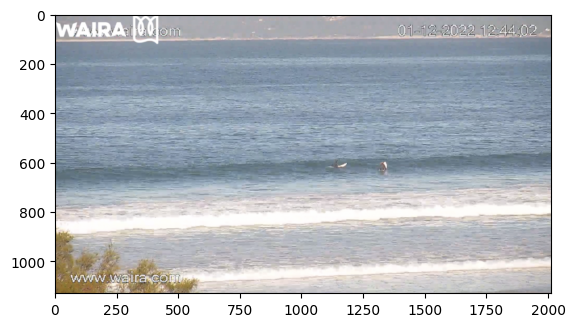

In [91]:
plt.imshow(test_image)

In [92]:
test_image = preprocess_image_improved(test_image,300)
test_image = np.array([(test_image)])
test_image = test_image.reshape(1,300,300,8)

In [93]:
output = test_model.predict(test_image)

1/1 [==============================] - 0s 100ms/step


In [94]:
output

array([[0.27227962, 0.2422186 , 0.48550174]], dtype=float32)

In [47]:


flat,chaotic,good = test_model.predict(test_image)[0]



1/1 [==============================] - 0s 31ms/step


In [73]:

def return_outcome(flat=flat,chaotic=chaotic,good=good):
    if flat >chaotic and flat > good:
        return f"Now is mostly flat, with a certainty of {flat:.2f}"
    elif chaotic > flat and chaotic > good:
        return f"Now is mostly chaotic at sea with a certainty of {chaotic:.2f}"
    elif good > flat and good > chaotic:
        return f"Now is mostly a good time for surfing, with a certainty of {good:.2f} "
    else:
        return "Undetermined result, we suck!"

In [74]:
return_outcome()

'Now is mostly a good time for surfing, with a certainty of 0.65 '

In [ ]:
improved_model.predict(test_image)

1/1 [==============================] - 0s 80ms/step


array([[0.24275489, 0.02381151, 0.73343354]], dtype=float32)